# Team 8 - Analysis on Southeast Asia (Optimus Prime)

## Introduction

The Southeast Asian region traditionally includes Burma and Thailand and excludes Japan, Hong Kong, Macau, North Korea, and South Korea but for the purpose of this study, the latter will be considered as a part of the region. A majority of the countries in the region is famed for its tropical weather, maritime culture, and relatively affordable living expenses. This makes the region a tourist hotspot for people all over the world with some notable locations such as Indonesia's Bali and Philippines' Palawan, as well as events such as Japan's Cherry Blossom and Thailand's Blue Moon festival (Asia Society, 2020). 

Source: https://asiasociety.org/education/introduction-southeast-asia

In [1]:
#imports
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

#converting data types with a dictionary
data_types = {"Country Code Total": str,
              "Cool Name": str}
#Formatting data to two decimals places with commas
pd.options.display.float_format = '{:,.2f}'.format

#shortcutting file location
file_data = "./datasets/Final_Project_Dataset.xlsx"

#Importing country dataset to python
finals_country = pd.read_excel(io = file_data,
                      sheet_name = 'Data',
                      header = 0,
                      dtype = data_types).round(decimals = 2)

#Importing east/southeast asia dataset to python
asia = finals_country.loc [ : , : ][finals_country.loc[ : , 'Cool Name'] == "Optimus Prime"].copy()

asia


,Country Code Total,Country Name,Hult Region,Cool Name,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),...,Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
28,BRN,Brunei Darussalam,East/Southeast Asia,Optimus Prime,nan,nan,16.52,nan,99.70,24.05,...,nan,nan,3.00,105.36,nan,nan,nan,9.73,105.91,2.50
81,HKG,"Hong Kong SAR, China",East/Southeast Asia,Optimus Prime,nan,nan,3.01,nan,nan,6.32,...,nan,nan,2.50,nan,nan,nan,nan,11.21,376.66,3.40
86,IDN,Indonesia,East/Southeast Asia,Optimus Prime,"17,000.00",96.32,51.30,2.00,74.86,1.76,...,92.65,0.30,17.00,96.09,11.60,"266,277.00",93.36,62.10,58.56,55.00
97,JPN,Japan,East/Southeast Asia,Optimus Prime,100.00,99.77,4.99,57.00,99.80,9.45,...,nan,0.10,2.50,nan,9.40,nan,99.77,14.91,34.40,3.10
101,KHM,Cambodia,East/Southeast Asia,Optimus Prime,"3,100.00",94.60,47.35,40.00,nan,0.28,...,nan,0.90,18.70,85.94,16.30,"42,124.00",94.60,82.66,133.32,27.00
104,KOR,"Korea, Rep.",East/Southeast Asia,Optimus Prime,nan,99.77,1.95,nan,nan,10.35,...,nan,nan,2.50,100.02,13.70,"1,052.00",99.50,34.08,99.93,6.00
106,LAO,Lao PDR,East/Southeast Asia,Optimus Prime,500.00,87.73,69.74,12.00,nan,0.16,...,nan,0.30,23.60,78.65,25.20,"19,347.00",87.73,85.94,81.85,68.00
117,MAC,"Macao SAR, China",East/Southeast Asia,Optimus Prime,nan,86.14,3.17,nan,nan,2.60,...,nan,nan,13.70,92.70,nan,nan,86.04,7.37,127.27,7.20
137,MYS,Malaysia,East/Southeast Asia,Optimus Prime,"5,200.00",95.52,12.83,13.00,98.60,7.53,...,nan,0.50,4.20,99.29,10.80,"6,071.00",95.52,25.50,176.67,4.80
152,PHL,Philippines,East/Southeast Asia,Optimus Prime,200.00,88.67,55.12,7.00,62.20,0.87,...,91.10,0.10,13.30,91.83,20.50,"23,655.00",88.27,47.97,76.28,31.00


## Missing Values Methodology & Obscure Findings

As can be seen in the dataset above, there are still several missing values. Before performing an analysis on the Southeast Asian region, the missing values had to be determined and then filled. 

Below is the total count of missing values per variable in our region. 

In [2]:
#Identifying the number of blank numbers per item 
asia.isnull
print(asia.isnull().sum())

Country Code Total                                                            0
Country Name                                                                  0
Hult Region                                                                   0
Cool Name                                                                     0
AIDS estimated deaths (UNAIDS estimates)                                      6
Adjusted net enrollment rate, primary (% of primary school age children)      4
Adolescent fertility rate (births per 1,000 women ages 15-19)                 0
Antiretroviral therapy coverage (% of people living with HIV)                 6
Births attended by skilled health staff (% of total)                          8
CO2 emissions (metric tons per capita)                                        0
Contributing family workers, female (% of female employment)                  0
Contributing family workers, male (% of male employment)                      0
Contributing family workers, total (% of

With the missing data determined, three(four) methods of assumptions were used for imputing data into the data set:

1.) Country Specific Assumptions
2.) Column Specific Assumptions
3.) Assumptions based on the skewing of data (Mean or Median)
Optional - 4.) Left unfilled altogether.

Country Specific Assumptions: 
The first items to be filled were the countries where their data points could be made based on the given data set and/or external research. For countries like East Timor and North Korea, the minimum value for certain categories were used based on East Timor's recent independence and North Korea's low economic performance. 
It was clear that Hong Kong and Brunei often were the missing values in the variable. Hence, Macau and Hong Kong were treated very similarly in our methodology of filling in their data, where we treated the data for one country as the data for the other. During instances where both country's data seemed to be missing, the mean of China and high income countries within our region was used. The decision to include China's data is due to the influence it has on both Macau and Hong Kong. The same assumption was made for Brunei where the mean was used with the exclusion of China's data. 

Column Specific Assumptions:
Next, we saw some high correlations in the three variables
1) primary completion rate
2) primary completion rate adjusted
3) school enrollment
Therefore, the missing values for these are based on the % difference. The same methodology is used for the variables related to fertility rate and births. 

Skewed data:
After having filled some of the missing values based on countries and correlation of columns, the rest of the missing values was filled using either mean or median depending on the skewing of the dataset. The graphs can be viewed in the end in appendix. 

Obscure findings:

The values where 10 or more values was missing we did not fill out for accuracy purposes due to our region being very diverse thus would not be accurate to fill missing values. (World Bank, 2020)

It was found that North Korea and East Timor often was missing which is due to North Korea not being a member of the World Bank hence the data points can be questioned from that country (World Bank, 2020). East Timor was often missing due to a recently gained independency which accordingly to World Bank is the reason for the missing data points. 

The three variables: income share held by lowest 20%, ODA per capita and poverty gap at national poverty lines - since high-income countries do not report this data it was often missing (World Bank, 2020). Hence, therefore the missing data was not filled as our region has a lot of high-income countries as well where the data from the low-income countries would not be representative.  
Definitions and methods of data collections of literacy rate differs from country to country hence, it was chosen not to use this column as well (World Bank, 2020).

Sources:
https://databank.worldbank.org/metadataglossary/millennium-development-goals/series/SH.STA.ACSN
https://datahelpdesk.worldbank.org/knowledgebase/articles/198559-why-is-there-missing-data-for-high-income-countrie
https://databank.worldbank.org/metadataglossary/environment-social-and-governance-(esg)-data/series/SE.ADT.LITR.ZS
https://datahelpdesk.worldbank.org/knowledgebase/articles/191133-why-are-some-data-not-available


In [3]:
#Sliced data for high income countries to fill in mean/median data for HK, Macau, East Timor, Singapore, and Brunei
high_income_asia=finals_country.iloc[[28,35,81,97,104,117,169],:]

#Fill in data for items with 1 missing value
##Filling in East Timor's GDP per person employed. The minimum was used since the country has a low income and only received independence in 2002
gdp_employed_min = round(asia['GDP per person employed (constant 2011 PPP $)'].min(), ndigits = 2)
asia['GDP per person employed (constant 2011 PPP $)'].fillna(value = gdp_employed_min,
                                    inplace = True)


#The following data points are for North Korea and since their performance is usually subpar, the minimum was used
gni_min = round(asia['GNI per capita, Atlas method (current US$)'].min(), ndigits = 2)
asia['GNI per capita, Atlas method (current US$)'].fillna(value = gni_min,
                                inplace = True)

internet_users_min = round(asia['Internet users (per 100 people)'].median(),ndigits = 2)
asia['Internet users (per 100 people)'].fillna(value = internet_users_min,
                                               inplace = True)

cellular_subs_min = round(asia['Mobile cellular subscriptions (per 100 people)'].median(),ndigits = 2)
asia['Mobile cellular subscriptions (per 100 people)'].fillna(value = cellular_subs_min,
                                                              inplace = True)
                                                            
trade_min = round(asia['Trade (% of GDP)'].min(),ndigits = 2)
asia['Trade (% of GDP)'].fillna(value = trade_min,
                               inplace = True)


#Filling in Singapore undernourishment, since the country is in the higher income range and has a high life expectancy, the minimum value was used
undernourishment_min = round(asia['Prevalence of undernourishment (% of population)'].min(), ndigits = 2)
asia['Prevalence of undernourishment (% of population)'].fillna(value = undernourishment_min,
                                    inplace = True)


#Filling in Hong Kong and Macau data based on each other's data since the countries are similar
#Filling in Hong Kong  with Macau's data
asia.iloc[1,5] = asia.iloc[7,5] #Adjusted Primary Enrollment rate

asia.iloc[1,38] = asia.iloc[7,38] #Primary completion rate

asia.iloc[1,41] = asia.iloc[7,41] #Primary enrollment rate

#Filling in Macau's data with Hong Kong's data
asia.iloc[7,16] = asia.iloc[1,16] #Energy Use per $1000

asia.iloc[7,19] = asia.iloc[1,19] #GDP per unit of energy


#Filling in Brunei data based on an average of high income countries in the region
brunei_adjusted_enroll = round(high_income_asia['Adjusted net enrollment rate, primary (% of primary school age children)'].mean(), ndigits =2)
asia.iloc[0,5] = brunei_adjusted_enroll

brunei_enroll = round(high_income_asia['Adjusted net enrollment rate, primary (% of primary school age children)'].mean(), ndigits =2)
asia.iloc[0,41] = brunei_enroll

#Filling in data for Macau and Hong Kong
measles_immunization = round(high_income_asia['Immunization, measles (% of children ages 12-23 months)'].median(), ndigits = 2)
asia['Immunization, measles (% of children ages 12-23 months)'].fillna(value = measles_immunization,
                                          inplace = True)
maternal_mortality = round(high_income_asia['Maternal mortality ratio (modeled estimate, per 100,000 live births)'].mean(),ndigits = 2)
asia['Maternal mortality ratio (modeled estimate, per 100,000 live births)'].fillna(value = maternal_mortality,
                                               inplace = True)

infant_mortality = round(high_income_asia['Mortality rate, infant (per 1,000 live births)'].mean(), ndigits = 2)
asia['Mortality rate, infant (per 1,000 live births)'].fillna(value = infant_mortality,
                                       inplace = True)


#Filling in data for Brunei, Macau, and Hong Kong
sanitation_access = round(high_income_asia['Improved sanitation facilities (% of population with access)'].mean(), ndigits = 2)
asia['Improved sanitation facilities (% of population with access)'].fillna(value = sanitation_access,
                                            inplace = True)

water_access = round(high_income_asia['Improved water source (% of population with access)'].mean(),ndigits = 2)
asia['Improved water source (% of population with access)'].fillna(value = water_access,
                                     inplace = True)

women_parliament_median = round(high_income_asia['Proportion of seats held by women in national parliaments (%)'].mean(), ndigits = 2)
asia['Proportion of seats held by women in national parliaments (%)'].fillna(value = women_parliament_median,
                                          inplace = True)


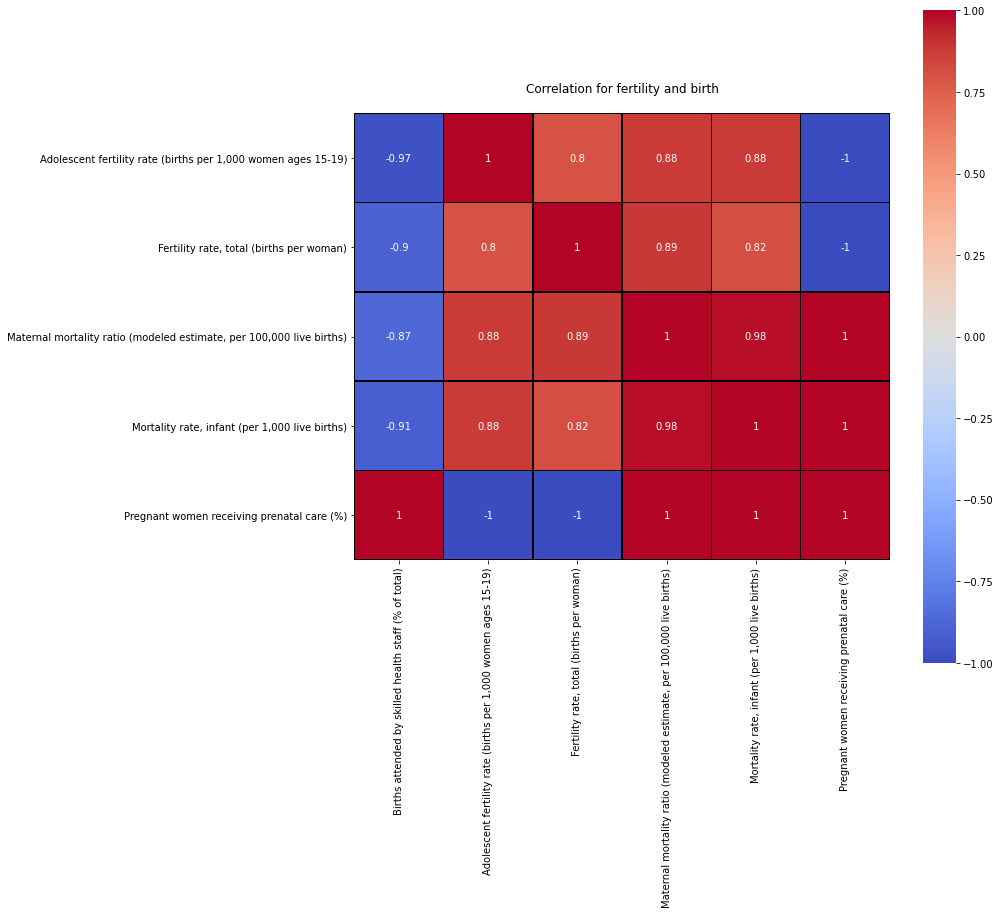

,Births attended by skilled health staff (% of total),"Adolescent fertility rate (births per 1,000 women ages 15-19)","Fertility rate, total (births per woman)","Maternal mortality ratio (modeled estimate, per 100,000 live births)","Mortality rate, infant (per 1,000 live births)",Pregnant women receiving prenatal care (%)
"Adolescent fertility rate (births per 1,000 women ages 15-19)",-0.97,1.00,0.80,0.88,0.88,-1.00
"Fertility rate, total (births per woman)",-0.90,0.80,1.00,0.89,0.82,-1.00
"Maternal mortality ratio (modeled estimate, per 100,000 live births)",-0.87,0.88,0.89,1.00,0.98,1.00
"Mortality rate, infant (per 1,000 live births)",-0.91,0.88,0.82,0.98,1.00,1.00
Pregnant women receiving prenatal care (%),1.00,-1.00,-1.00,1.00,1.00,1.00


In [4]:
#Doing a pearson correlation analysis of everything related to birth and fertility

#choosing dataset and method
asia_corr = asia.corr(method = 'pearson').round(decimals = 2)

#choosing the figure size
fig, ax = plt.subplots(figsize=(12,12))

#choosing the columns 
x = asia_corr.loc[ ['Adolescent fertility rate (births per 1,000 women ages 15-19)', 'Fertility rate, total (births per woman)', 'Maternal mortality ratio (modeled estimate, per 100,000 live births)', 'Mortality rate, infant (per 1,000 live births)', 'Pregnant women receiving prenatal care (%)']
,['Births attended by skilled health staff (% of total)', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'Fertility rate, total (births per woman)', 'Maternal mortality ratio (modeled estimate, per 100,000 live births)', 'Mortality rate, infant (per 1,000 live births)', 'Pregnant women receiving prenatal care (%)']]

sns.heatmap(data = x,
           cmap = 'coolwarm',
           square = True,
           annot = True, 
           linecolor = 'black',
           linewidths = 0.5)

#title of map
plt.title("""
Correlation for fertility and birth
""")

#which columns to show 
plt.show()
asia_corr.loc[ ['Adolescent fertility rate (births per 1,000 women ages 15-19)', 'Fertility rate, total (births per woman)', 'Maternal mortality ratio (modeled estimate, per 100,000 live births)', 'Mortality rate, infant (per 1,000 live births)', 'Pregnant women receiving prenatal care (%)']
,['Births attended by skilled health staff (% of total)', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'Fertility rate, total (births per woman)', 'Maternal mortality ratio (modeled estimate, per 100,000 live births)', 'Mortality rate, infant (per 1,000 live births)', 'Pregnant women receiving prenatal care (%)']]


As per the correlation it can be seen that there are some strong correlations. Hence, we will further calculate the % difference and use that as our method to fill in the missing values of these columns. 

In [5]:
#Adolescent * % change from adolescent to births attended by staff


#change in percentage from adolescent fertility to birhs attended by health staff
BRU =(16.5214-99.7)/99.7

IDN = (51.299-74.86)/74.86

JPN = (4.987-99.8)/99.8

MYS = (12.8266-98.6)/98.6

PHL = (55.1214-62.2)/62.2

SGP = (5.5506-99.8)/99.8

#avergae % difference 
PCT_ch = (BRU + IDN + JPN + MYS + PHL + SGP)/6
print(f"""The average change from adolescent to births attended by health staff is {PCT_ch}""")

# Adolescent * % change from adolescent to births attended by staff

KHM = 47.3456 * 1.67
print("New value for births Cambodia is:")
print(KHM)
KOR = 1.9524 * 1.67
print("New value for births korea is:")
print(KOR)
LAO = 69.7392 * 1.67
print("New value for births lao is:")
print(LAO)
MAC = 3.1682 * 1.67
print("New value for births macao is:")
print(MAC)
PRK = 0.5744 * 1.67
print("New value for births korea is:")
print(PRK)
TLS = 63.0882 * 1.67
print("New value for births East Timor is:")
print(TLS)
VNM = 31.849 * 1.67
print("New value for births Vietnam is:")
print(VNM)


#values below belongs to "Births attended by skilled health staff (% of total)"

#use fillna to fill in these values!
asia.iloc[4,8] = 79.067 #Cambodia
asia.iloc[5,8] = 3.261 #KOR
asia.iloc[6,8] = 116.464 #LAO
asia.iloc[7,8] = 5.291 #MAC
asia.iloc[10,8] = 0.959 #PRK
asia.iloc[12,8] = 105.357 #TLS
asia.iloc[13,8] = 53.188 #VNM



The average change from adolescent to births attended by health staff is -0.6711920833546962
New value for births Cambodia is:
79.067152
New value for births korea is:
3.2605079999999997
New value for births lao is:
116.46446399999999
New value for births macao is:
5.290894
New value for births korea is:
0.959248
New value for births East Timor is:
105.357294
New value for births Vietnam is:
53.18783


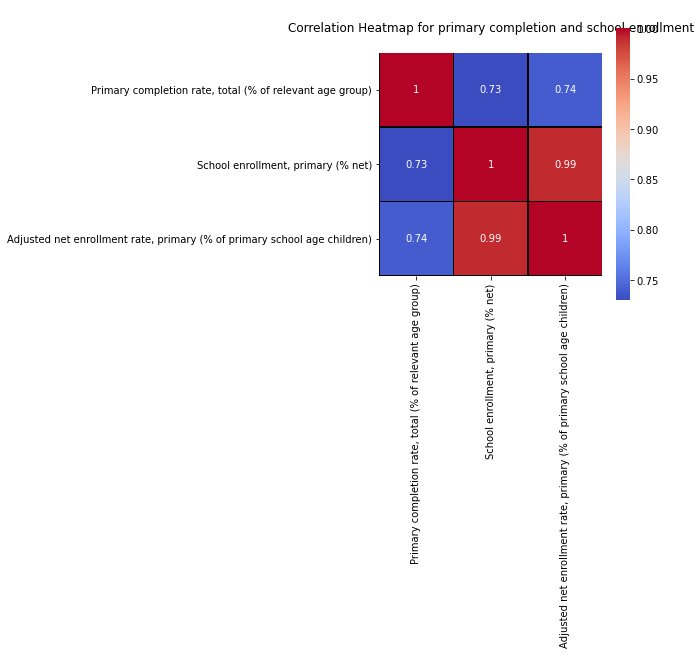

,"Primary completion rate, total (% of relevant age group)","School enrollment, primary (% net)","Adjusted net enrollment rate, primary (% of primary school age children)"
"Primary completion rate, total (% of relevant age group)",1.00,0.73,0.74
"School enrollment, primary (% net)",0.73,1.00,0.99
"Adjusted net enrollment rate, primary (% of primary school age children)",0.74,0.99,1.00


In [6]:
#choosing pearson as our method
asia_corr = asia.corr(method = 'pearson').round(decimals = 2)

#choosing our figure size
fig, ax = plt.subplots(figsize=(5,5))

#choosing our columns
x = asia_corr.loc[['Primary completion rate, total (% of relevant age group)','School enrollment, primary (% net)','Adjusted net enrollment rate, primary (% of primary school age children)'],['Primary completion rate, total (% of relevant age group)','School enrollment, primary (% net)','Adjusted net enrollment rate, primary (% of primary school age children)']]

#settings for heatmap
sns.heatmap(data = x,
           cmap = 'coolwarm',
           square = True,
           annot = True, 
           linecolor = 'black',
           linewidths = 0.5)

#title of heatmap
plt.title("""
Correlation Heatmap for primary completion and school enrollment
""")

#columns used
plt.show()
asia_corr.loc[['Primary completion rate, total (% of relevant age group)','School enrollment, primary (% net)','Adjusted net enrollment rate, primary (% of primary school age children)'],['Primary completion rate, total (% of relevant age group)','School enrollment, primary (% net)','Adjusted net enrollment rate, primary (% of primary school age children)']]

As can per viewed in table above there is strong correlations within these 3 variables as well. Hence, same methodology as above explained is used. The boxplot also shows us that the two variables are very closely related. 

In [7]:
#average difference on primary and school enrollment

IND =(93.36-96.09)/96.09

CAM = (94.60-85.94)/85.94

KOR = (99.50-100.02)/100.02

LAO = (87.73-92.70)/92.70

MAC = (86.04-99.29)/99.29

MAL = (95.52-99.29)/99.29

PHI = (88.27-91.83)/91.83

EAT = (69.56-76.63)/76.63

#percentage change in total
PCT_change = (IND + CAM + KOR + LAO + MAC + MAL + PHI + EAT)/8
print(f"""The average change from primary to school enrollmen is {PCT_change}""")

#Primary - %CHANGE
#SCHOOL + % CHANGE

#hence new values are:
JAP = 99.77*1.036
print("New value for primary Japan is:")
print(JAP)
VIE =  96.78*1.036
print("New value for primary Vietnam is:")
print(VIE)

# filled in 'Primary completion rate, total (% of relevant age group)' for japan and vietnam
#used fillna to fill in these values!
asia.iloc[4,38] = 103.36172 #Japan
asia.iloc[13,38] = 100.26408 #Vietnam

The average change from primary to school enrollmen is -0.03611269002955066
New value for primary Japan is:
103.36172
New value for primary Vietnam is:
100.26408


[Text(1, 0, 'Adjusted Primary Enrollment Rate'),
 Text(2, 0, 'Primary Completion Rate')]

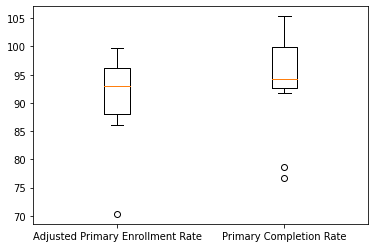

In [9]:
#PRIMARY AND SCHOOL BOXPLOT

my_dict = {'Adjusted Primary Enrollment Rate': [95.23,86.14,96.32,99.77,94.60,99.77,87.73,86.14,95.52,88.67,91.45,91.45,70.33,97.15], 'Primary Completion Rate': [105.36,92.70,96.09,94.26,103.36,100.02,78.65,92.70,99.29,91.83,94.26,94.26,76.63,100.26]}

#Setting figure size
fig, ax = plt.subplots()

#Creating a boxplot
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

Lastly, we filled in the last missing values using mean or median depending on how the dataset is skewed. The graphs for this can be seen below in appendix. 

In [10]:
#Depending on how the graphs are skewed we decided for mean or median to fill in the last values. The graphs can be viewed in appendix in the end. 

adjusted_AIDS_median = round(asia['AIDS estimated deaths (UNAIDS estimates)'].median(), ndigits =2)
asia['AIDS estimated deaths (UNAIDS estimates)'].fillna(value = adjusted_AIDS_median,
                                         inplace = True)

adjusted_births_median = round(asia['Births attended by skilled health staff (% of total)'].median(), ndigits =2)
asia['Births attended by skilled health staff (% of total)'].fillna(value = adjusted_births_median,
                                         inplace = True)

adjusted_enrollment_mean = round(asia['Adjusted net enrollment rate, primary (% of primary school age children)'].mean(), ndigits =2)
asia['Adjusted net enrollment rate, primary (% of primary school age children)'].fillna(value = adjusted_enrollment_mean,
                                         inplace = True)

adjusted_Antiretroviral_median = round(asia['Antiretroviral therapy coverage (% of people living with HIV)'].median(), ndigits =2)
asia['Antiretroviral therapy coverage (% of people living with HIV)'].fillna(value = adjusted_Antiretroviral_median,
                                         inplace = True)

adjusted_CO2_median = round(asia['CO2 emissions (metric tons per capita)'].median(), ndigits =2)
asia['CO2 emissions (metric tons per capita)'].fillna(value = adjusted_CO2_median,
                                         inplace = True)

adjusted_Employmentfemale_mean = round(asia['Employment to population ratio, 15+, female (%) (modeled ILO estimate)'].mean(), ndigits =2)
asia['Employment to population ratio, 15+, female (%) (modeled ILO estimate)'].fillna(value = adjusted_Employmentfemale_mean,
                                         inplace = True)

adjusted_Employmentmale_mean = round(asia['Employment to population ratio, 15+, male (%) (modeled ILO estimate)'].mean(), ndigits =2)
asia['Employment to population ratio, 15+, male (%) (modeled ILO estimate)'].fillna(value = adjusted_Employmentmale_mean,
                                         inplace = True)

adjusted_Employmenttotal_median = round(asia['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'].median(), ndigits =2)
asia['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'].fillna(value = adjusted_Employmenttotal_median,
                                         inplace = True)

adjusted_Energy_mean = round(asia['Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)'].mean(), ndigits =2)
asia['Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)'].fillna(value = adjusted_Energy_mean,
                                         inplace = True)

adjusted_Fertility_median = round(asia['Fertility rate, total (births per woman)'].median(), ndigits =2)
asia['Fertility rate, total (births per woman)'].fillna(value = adjusted_Fertility_median,
                                         inplace = True)

adjusted_GDPperson_median = round(asia['GDP per person employed (constant 2011 PPP $)'].median(), ndigits =2)
asia['GDP per person employed (constant 2011 PPP $)'].fillna(value = adjusted_GDPperson_median,
                                         inplace = True)

adjusted_GDPunit_median = round(asia['GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent)'].median(), ndigits =2)
asia['GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent)'].fillna(value = adjusted_GDPunit_median,
                                         inplace = True)

adjusted_GNIcapita_median = round(asia['GNI per capita, Atlas method (current US$)'].median(), ndigits =2)
asia['GNI per capita, Atlas method (current US$)'].fillna(value = adjusted_GNIcapita_median,
                                         inplace = True)

adjusted_Immunization_mean = round(asia['Immunization, measles (% of children ages 12-23 months)'].mean(), ndigits =2)
asia['Immunization, measles (% of children ages 12-23 months)'].fillna(value = adjusted_Immunization_mean,
                                         inplace = True)

adjusted_Improvedsanitation_mean = round(asia['Improved sanitation facilities (% of population with access)'].mean(), ndigits =2)
asia['Improved sanitation facilities (% of population with access)'].fillna(value = adjusted_Improvedsanitation_mean,
                                         inplace = True)

adjusted_Improvedwater_mean = round(asia['Improved water source (% of population with access)'].mean(), ndigits =2)
asia['Improved water source (% of population with access)'].fillna(value = adjusted_Improvedwater_mean,
                                         inplace = True)

adjusted_Incidence_median = round(asia['Incidence of tuberculosis (per 100,000 people)'].median(), ndigits =2)
asia['Incidence of tuberculosis (per 100,000 people)'].fillna(value = adjusted_Incidence_median,
                                         inplace = True)

adjusted_Internet_mean = round(asia['Internet users (per 100 people)'].mean(), ndigits =2)
asia['Internet users (per 100 people)'].fillna(value = adjusted_Internet_mean,
                                         inplace = True)

adjusted_Life_mean = round(asia['Life expectancy at birth, total (years)'].mean(), ndigits =2)
asia['Life expectancy at birth, total (years)'].fillna(value = adjusted_Life_mean,
                                         inplace = True)

adjusted_Maternal_median = round(asia['Maternal mortality ratio (modeled estimate, per 100,000 live births)'].median(), ndigits =2)
asia['Maternal mortality ratio (modeled estimate, per 100,000 live births)'].fillna(value = adjusted_Maternal_median,
                                         inplace = True)

adjusted_Mobile_median = round(asia['Mobile cellular subscriptions (per 100 people)'].median(), ndigits =2)
asia['Mobile cellular subscriptions (per 100 people)'].fillna(value = adjusted_Mobile_median,
                                         inplace = True)

adjusted_PrevalenceHIV_median = round(asia['Prevalence of HIV, total (% of population ages 15-49)'].median(), ndigits =2)
asia['Prevalence of HIV, total (% of population ages 15-49)'].fillna(value = adjusted_PrevalenceHIV_median,
                                         inplace = True)

adjusted_Prevalenceundernourishment_median = round(asia['Prevalence of undernourishment (% of population)'].median(), ndigits =2)
asia['Prevalence of undernourishment (% of population)'].fillna(value = adjusted_Prevalenceundernourishment_median,
                                         inplace = True)

adjusted_Proportion_mean = round(asia['Proportion of seats held by women in national parliaments (%)'].mean(), ndigits =2)
asia['Proportion of seats held by women in national parliaments (%)'].fillna(value = adjusted_Proportion_mean,
                                         inplace = True)

adjusted_Reported_median = round(asia['Reported cases of malaria'].median(), ndigits =2)
asia['Reported cases of malaria'].fillna(value = adjusted_Reported_median,
                                         inplace = True)

adjusted_Selfemployed_median = round(asia['Self-employed, total (% of total employment)'].median(), ndigits =2)
asia['Self-employed, total (% of total employment)'].fillna(value = adjusted_Selfemployed_median,
                                         inplace = True)

adjusted_Trade_median = round(asia['Trade (% of GDP)'].median(), ndigits =2)
asia['Trade (% of GDP)'].fillna(value = adjusted_Trade_median,
                                         inplace = True)

adjusted_Tuberculosis_median = round(asia['Tuberculosis death rate (per 100,000 people), including HIV'].median(), ndigits =2)
asia['Tuberculosis death rate (per 100,000 people), including HIV'].fillna(value = adjusted_Tuberculosis_median,
                                         inplace = True)


adjusted_Primary_mean = round(asia['Primary completion rate, total (% of relevant age group)'].mean(), ndigits =2)
asia['Primary completion rate, total (% of relevant age group)'].fillna(value = adjusted_Primary_mean,
                                         inplace = True)


adjusted_School_median = round(asia['School enrollment, primary (% net)'].median(), ndigits =2)
asia['School enrollment, primary (% net)'].fillna(value = adjusted_School_median,
                                         inplace = True)


In [12]:
#Showing dataset with filled in values
asia

,Country Code Total,Country Name,Hult Region,Cool Name,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),...,Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
28,BRN,Brunei Darussalam,East/Southeast Asia,Optimus Prime,"1,800.00",95.23,16.52,12.50,99.70,24.05,...,nan,0.30,3.00,105.36,17.23,"19,347.00",95.23,9.73,105.91,2.50
81,HKG,"Hong Kong SAR, China",East/Southeast Asia,Optimus Prime,"1,800.00",86.14,3.01,12.50,79.07,6.32,...,nan,0.30,2.50,92.70,17.23,"19,347.00",86.04,11.21,376.66,3.40
86,IDN,Indonesia,East/Southeast Asia,Optimus Prime,"17,000.00",96.32,51.30,2.00,74.86,1.76,...,92.65,0.30,17.00,96.09,11.60,"266,277.00",93.36,62.10,58.56,55.00
97,JPN,Japan,East/Southeast Asia,Optimus Prime,100.00,99.77,4.99,57.00,99.80,9.45,...,nan,0.10,2.50,94.26,9.40,"19,347.00",99.77,14.91,34.40,3.10
101,KHM,Cambodia,East/Southeast Asia,Optimus Prime,"3,100.00",94.60,47.35,40.00,79.07,0.28,...,nan,0.90,18.70,103.36,16.30,"42,124.00",94.60,82.66,133.32,27.00
104,KOR,"Korea, Rep.",East/Southeast Asia,Optimus Prime,"1,800.00",99.77,1.95,12.50,3.26,10.35,...,nan,0.30,2.50,100.02,13.70,"1,052.00",99.50,34.08,99.93,6.00
106,LAO,Lao PDR,East/Southeast Asia,Optimus Prime,500.00,87.73,69.74,12.00,116.46,0.16,...,nan,0.30,23.60,78.65,25.20,"19,347.00",87.73,85.94,81.85,68.00
117,MAC,"Macao SAR, China",East/Southeast Asia,Optimus Prime,"1,800.00",86.14,3.17,12.50,5.29,2.60,...,nan,0.30,13.70,92.70,17.23,"19,347.00",86.04,7.37,127.27,7.20
137,MYS,Malaysia,East/Southeast Asia,Optimus Prime,"5,200.00",95.52,12.83,13.00,98.60,7.53,...,nan,0.50,4.20,99.29,10.80,"6,071.00",95.52,25.50,176.67,4.80
152,PHL,Philippines,East/Southeast Asia,Optimus Prime,200.00,88.67,55.12,7.00,62.20,0.87,...,91.10,0.10,13.30,91.83,20.50,"23,655.00",88.27,47.97,76.28,31.00


Above is the table for our region with the filled in missing values

In [13]:
asia.isnull().sum()

Country Code Total                                                            0
Country Name                                                                  0
Hult Region                                                                   0
Cool Name                                                                     0
AIDS estimated deaths (UNAIDS estimates)                                      0
Adjusted net enrollment rate, primary (% of primary school age children)      0
Adolescent fertility rate (births per 1,000 women ages 15-19)                 0
Antiretroviral therapy coverage (% of people living with HIV)                 0
Births attended by skilled health staff (% of total)                          0
CO2 emissions (metric tons per capita)                                        0
Contributing family workers, female (% of female employment)                  0
Contributing family workers, male (% of male employment)                      0
Contributing family workers, total (% of

## Region Unique Features

After having checked that all missing values are filled, except the ones where 10 or more are missing, we are going to dig into which variables are unique for our region. 

The first discovery was GNI per capita, which mainly is dominated by the western world. However, South East Asia also has several countries represented in the end of the table. All the countries from Southeast Asia are from high-income countries which indeed is a trait that all the countries in the table has in common. 
South East Asia is very diverse, with a lot of low income as well as high income countries. This can also be exploited in the boxplot where the outliers are detected. 

In [14]:
# unique column 1: GNI
finals_country.loc[ : ,['Country Name', 'Hult Region','GNI per capita, Atlas method (current US$)']][finals_country['GNI per capita, Atlas method (current US$)'] >= 32500].sort_values(by = ['GNI per capita, Atlas method (current US$)'], ascending = False)


,Country Name,Hult Region,"GNI per capita, Atlas method (current US$)"
120,Monaco,Western Europe,"186,080.00"
111,Liechtenstein,Western Europe,"121,650.00"
24,Bermuda,North America & Part of Latin America,"120,490.00"
115,Luxembourg,Western Europe,"88,240.00"
144,Norway,Eastern Europe,"87,360.00"
87,Isle of Man,Western Europe,"73,290.00"
162,Qatar,Arabian Peninsula,"67,810.00"
33,Switzerland,Western Europe,"62,940.00"
52,Denmark,Western Europe,"60,390.00"
181,Sweden,Eastern Europe,"55,380.00"


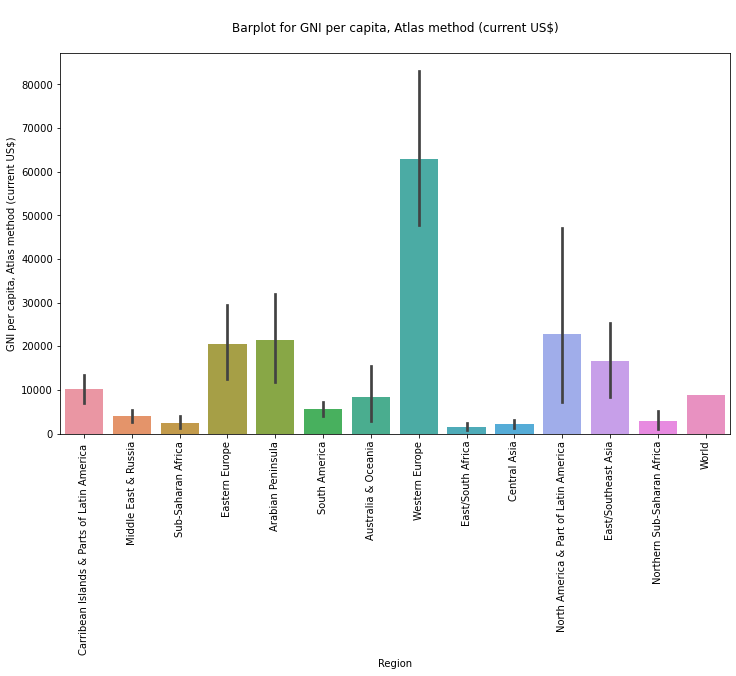

In [15]:
# Building Boxplot for GNI per capita, Atlas method (current US$)

#setting figure size
fig, ax = plt.subplots(figsize = [12,7])

#developing a boxplot for GNI per capita, Atlas method (current US$)
sns.barplot(x = "Hult Region",
           y = "GNI per capita, Atlas method (current US$)",
           hue = None,
           orient = 'v',
           data = finals_country)

#formating and displaying the plot
plt.title(label = """
Barplot for GNI per capita, Atlas method (current US$)
""")
plt.xlabel(xlabel = "Region")
plt.ylabel(ylabel = "GNI per capita, Atlas method (current US$)")
plt.xticks(rotation=90)
plt.show()

The 2nd feature where our region stands out is the net ODA received per capita where South East Asia are among the lowest. The main countries (25%-75%) are represented in the lower end which can be seen in the boxplot.  However, the below boxplot also revelas that there are some very high outliers which again is due to the diverse economics in the region. 

In [16]:
# unique part 2: ODA
finals_country.loc[ : , ['Country Name','Hult Region', 'Net ODA received per capita (current US$)']][finals_country['Net ODA received per capita (current US$)'] < 9].sort_values(by = ['Net ODA received per capita (current US$)'], ascending = True)



,Country Name,Hult Region,Net ODA received per capita (current US$)
189,Thailand,Central Asia,-9.30
152,Philippines,East/Southeast Asia,0.42
35,China,Central Asia,0.99
124,Mexico,North America & Part of Latin America,1.30
90,"Iran, Islamic Rep.",Middle East & Russia,1.38
88,India,Central Asia,1.68
205,"Venezuela, RB",South America,2.16
26,Brazil,South America,2.34
6,Argentina,South America,2.97
191,Turkmenistan,Middle East & Russia,3.68


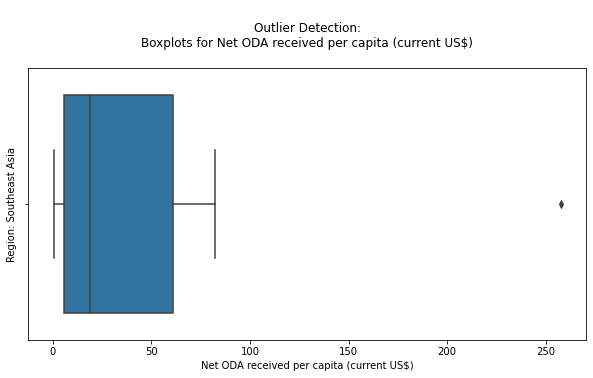

In [17]:
# Building Boxplot for Net ODA received per capita

#setting figure size
fig, ax = plt.subplots(figsize = [10, 5])

#developing a boxplot for ODA per capita
sns.boxplot(x = "Net ODA received per capita (current US$)",
           y = None,
           hue = None,
           orient = 'h',
           data = asia)

#formating and displaying the plot
plt.title(label = """
Outlier Detection:
Boxplots for Net ODA received per capita (current US$)
""")
plt.xlabel(xlabel = "Net ODA received per capita (current US$)")
plt.ylabel(ylabel = "Region: Southeast Asia")
plt.show()


The next feature where South East Asia is unique is the low adolescent fertility rate (births per 1000 women ages 15-19) among a lot of the countries - this can be detected by the big 25%-75% boxplot. A reason for this can be that Socioeconomic development is often found to be associated with falling birth rates, and South East
Asia is no exception with its high economic growth which also can be detected in the above table for GNI.

Source: https://www.eiu.com/graphics/marketing/pdf/fertility-in-south-east-asia-final.pdf

In [24]:
# unique part 3: Adolescent Fertility Rate
finals_country.loc[ : , ['Country Name','Hult Region', 'Adolescent fertility rate (births per 1,000 women ages 15-19)']][finals_country['Adolescent fertility rate (births per 1,000 women ages 15-19)'] < 5.56].sort_values(by = ['Adolescent fertility rate (births per 1,000 women ages 15-19)'], ascending = True) 

,Country Name,Hult Region,"Adolescent fertility rate (births per 1,000 women ages 15-19)"
157,"Korea, Dem. Rep.",East/Southeast Asia,0.57
104,"Korea, Rep.",East/Southeast Asia,1.95
81,"Hong Kong SAR, China",East/Southeast Asia,3.01
117,"Macao SAR, China",East/Southeast Asia,3.17
33,Switzerland,Western Europe,4.30
97,Japan,East/Southeast Asia,4.99
180,Slovenia,Eastern Europe,5.10
143,Netherlands,Western Europe,5.12
169,Singapore,East/Southeast Asia,5.55


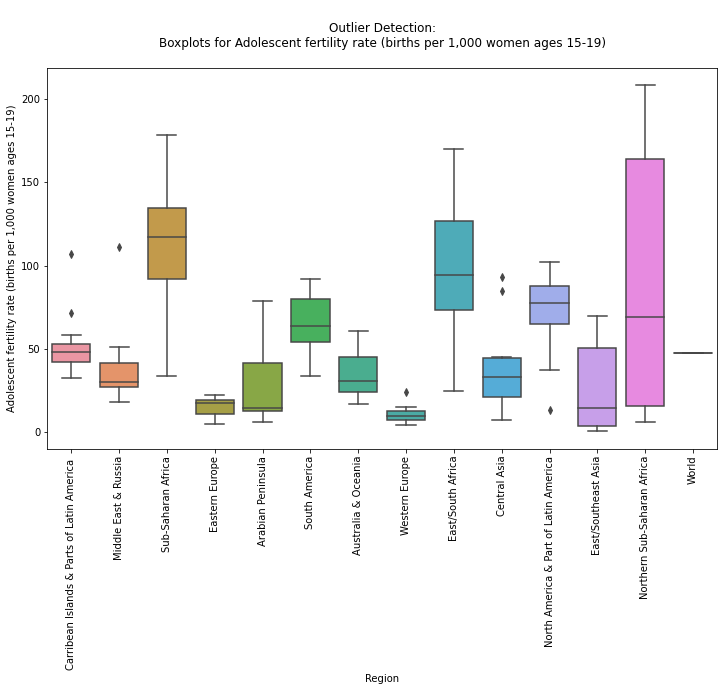

In [19]:
# Building Boxplot for Adolescent fertility rate (births per 1,000 women ages 15-19)

#setting figure size
fig, ax = plt.subplots(figsize = [12,7])

#developing a boxplot for Adolescent fertility rate (births per 1,000 women ages 15-19)
sns.boxplot(x = "Hult Region",
           y = "Adolescent fertility rate (births per 1,000 women ages 15-19)",
           hue = None,
           orient = 'v',
           data = finals_country)

#formating and displaying the plot
plt.title(label = """
Outlier Detection:
Boxplots for Adolescent fertility rate (births per 1,000 women ages 15-19)
""")
plt.xlabel(xlabel = "Region")
plt.ylabel(ylabel = "Adolescent fertility rate (births per 1,000 women ages 15-19)")
plt.xticks(rotation=90)
plt.show()

The 4th unique feature about South East Asia is that it includes 2 of the 10 countries with the largest population in the world. These 2 are: Indonesia and Japan which respectively are no. 4 and 10 on the list. This can also be detetected in the below boxplot where there are 2 major outliers representing these two countries, however, it can also be detected that the majority of the countries are from 20 to 70 millions.

In [20]:
# unique part 4: Total Population
#this has to be sorted
finals_country.loc[ : , ['Country Name', 'Hult Region', 'Population, total']][finals_country['Population, total'] > 120000000].sort_values(by = ['Population, total'], ascending = False)


,Country Name,Hult Region,"Population, total"
210,World,World,6766296679
35,China,Central Asia,1324655000
88,India,Central Asia,1197146906
202,United States,North America & Part of Latin America,304093966
86,Indonesia,East/Southeast Asia,236159276
26,Brazil,South America,192979029
149,Pakistan,Middle East & Russia,163644603
141,Nigeria,Sub-Saharan Africa,150347390
17,Bangladesh,Central Asia,148805814
164,Russian Federation,Middle East & Russia,142742350


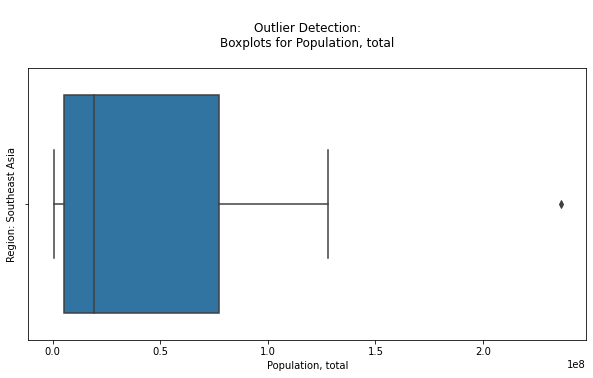

In [21]:
# Building Boxplot for Total Population

#setting figure size
fig, ax = plt.subplots(figsize = [10, 5])

#developing a boxplot for Total Population
sns.boxplot(x = "Population, total",
           y = None,
           hue = None,
           orient = 'h',
           data = asia)

#formating and displaying the plot
plt.title(label = """
Outlier Detection:
Boxplots for Population, total
""")
plt.xlabel(xlabel = "Population, total")
plt.ylabel(ylabel = "Region: Southeast Asia")
plt.show()

The 5th unique feature in about trade where South East Asia is represented in both the bottom and top of the table. Japan and East Timor are some of the countries with the lowest % of trade per GDP. Whereas countries such as Hong Kong and Singapore are having the highest % of trade per gdp which also can be seen in the boxplot below.

One of the reasons for the low trade % for Japan is the trade war between the US and China as China is Japans no. 1 country export (Reuters, 2019). The reasoning for East Timor is the low variety of export products as it only exports oil and gas (which accounts for 90%) and coffee. Furthermore, East Timor is a very poor country as well (International Trade Centre, 2020). 

Hong Kong is scoring high which is due to its position as a free and open economy which allows the territory to attract money from different parts of the world more efficiently than the rest of the region (CNBC, 2020).

Sources:

https://www.reuters.com/article/us-japan-economy-trade/japans-exports-fall-most-in-two-years-as-china-shipments-weaken-idUSKCN1Q82WP

https://www.intracen.org/country/timor-leste/

https://www.cnbc.com/2020/06/18/these-charts-show-why-hong-kong-is-important-to-china.html




In [25]:
## unique part 5: Lowest Trade % of GDP 
finals_country.loc[ : , ['Country Name', 'Hult Region', 'Trade (% of GDP)']][finals_country['Trade (% of GDP)'] < 35].sort_values(by = ['Trade (% of GDP)'], ascending = True)


,Country Name,Hult Region,Trade (% of GDP)
129,Myanmar,Central Asia,0.18
192,East Timor,East/Southeast Asia,20.44
26,Brazil,South America,27.26
202,United States,North America & Part of Latin America,29.94
57,Eritrea,East/South Africa,30.56
97,Japan,East/Southeast Asia,34.40
31,Central African Republic,Sub-Saharan Africa,34.44


In [26]:
# unique column 5: Highest Trade % of GDP
#Note for Camilla: Should this be different from the one above?
finals_country.loc[ : , ['Country Name', 'Hult Region', 'Trade (% of GDP)']][finals_country['Trade (% of GDP)'] > 370].sort_values(by = ['Trade (% of GDP)'], ascending = True)


,Country Name,Hult Region,Trade (% of GDP)
81,"Hong Kong SAR, China",East/Southeast Asia,376.66
169,Singapore,East/Southeast Asia,441.60
207,Virgin Islands (U.S.),Carribean Islands & Parts of Latin America,860.80


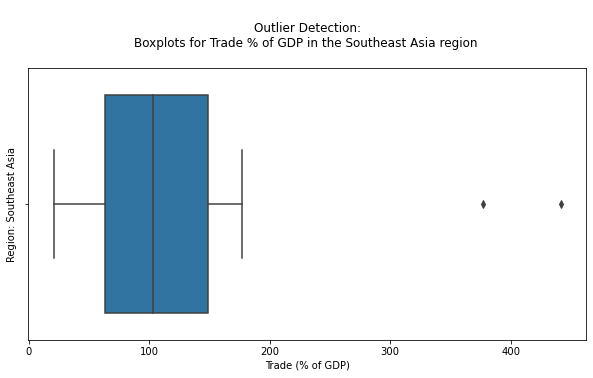

In [27]:
#Building Boxplot for Trade % of GDP
#setting figure size
fig, ax = plt.subplots(figsize = [10, 5])

#developing a boxplot for GDP
sns.boxplot(x = "Trade (% of GDP)",
           y = None,
           hue = None,
           orient = 'h',
           data = asia)


#adding legend
#plt.legend(labels = [Trade percentage of GDP])

#formating and displaying the plot
plt.title(label = """
Outlier Detection:
Boxplots for Trade % of GDP in the Southeast Asia region 
""")
plt.xlabel(xlabel = "Trade (% of GDP)")
plt.ylabel(ylabel = "Region: Southeast Asia")
plt.show()


It was found that low GDP, sanitation facilities and tuberculosis have strong correlations which can be viewed in the pearson table below (World Bank, 2020). 

The low GDP per capita indicates a low standard of living or a country that struggles to provide its inhabitants with what they need (statista, 2020). This relates to our lower income countries for South East Asia which have low access to improved sanitation facilities. This also is one reason explaining the high tuberculosis incidence in the area since according to world bank, Improved Sanitation Facilities "can be a measure for progress in the fight against poverty, disease, and death".

Sources:
https://www.statista.com/statistics/256547/the-20-countries-with-the-lowest-gdp-per-capita/
https://databank.worldbank.org/metadataglossary/millennium-development-goals/series/SH.STA.ACSN


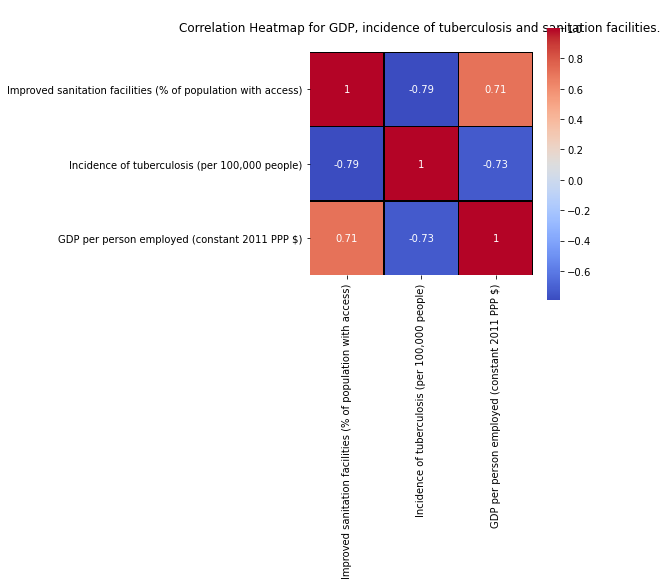

,Improved sanitation facilities (% of population with access),"Incidence of tuberculosis (per 100,000 people)",GDP per person employed (constant 2011 PPP $)
Improved sanitation facilities (% of population with access),1.00,-0.79,0.71
"Incidence of tuberculosis (per 100,000 people)",-0.79,1.00,-0.73
GDP per person employed (constant 2011 PPP $),0.71,-0.73,1.00


In [29]:
#Correlation between Improved Sanitation Facilities, Tuberculosis Incidence, and GDP Per Person Employed
asia_corr = asia.corr(method = 'pearson').round(decimals = 2)

#choosing our figure size
fig, ax = plt.subplots(figsize=(5,5))

#choosing our columns
x = asia_corr.loc[['Improved sanitation facilities (% of population with access)', 'Incidence of tuberculosis (per 100,000 people)', 'GDP per person employed (constant 2011 PPP $)'], ['Improved sanitation facilities (% of population with access)', 'Incidence of tuberculosis (per 100,000 people)', 'GDP per person employed (constant 2011 PPP $)']]

#settings for heatmap
sns.heatmap(data = x,
           cmap = 'coolwarm',
           square = True,
           annot = True, 
           linecolor = 'black',
           linewidths = 0.5)

#title of heatmap
plt.title("""
Correlation Heatmap for GDP, incidence of tuberculosis and sanitation facilities. 
""")

#columns used
plt.show()
asia_corr.loc[['Improved sanitation facilities (% of population with access)', 'Incidence of tuberculosis (per 100,000 people)', 'GDP per person employed (constant 2011 PPP $)'], ['Improved sanitation facilities (% of population with access)', 'Incidence of tuberculosis (per 100,000 people)', 'GDP per person employed (constant 2011 PPP $)']]


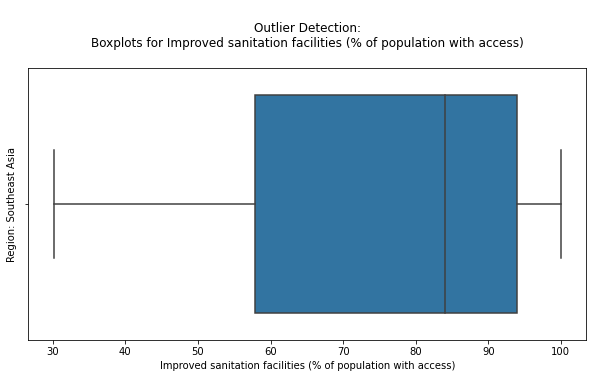

In [30]:
# Building Boxplot for Improved sanitation facilities (% of population with access)

#setting figure size
fig, ax = plt.subplots(figsize = [10, 5])

#developing a boxplot for Improved sanitation facilities (% of population with access)
sns.boxplot(x = "Improved sanitation facilities (% of population with access)",
           y = None,
           hue = None,
           orient = 'h',
           data = asia)

#formating and displaying the plot
plt.title(label = """
Outlier Detection:
Boxplots for Improved sanitation facilities (% of population with access)
""")
plt.xlabel(xlabel = "Improved sanitation facilities (% of population with access)")
plt.ylabel(ylabel = "Region: Southeast Asia")
plt.show()

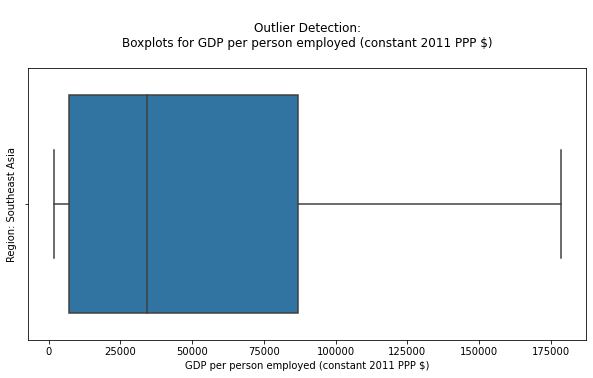

In [31]:
# Building Boxplot for GDP per person employed (constant 2011 PPP $)

#setting figure size
fig, ax = plt.subplots(figsize = [10, 5])

#developing a boxplot for GDP per person employed (constant 2011 PPP $)
sns.boxplot(x = "GDP per person employed (constant 2011 PPP $)",
           y = None,
           hue = None,
           orient = 'h',
           data = asia)

#formating and displaying the plot
plt.title(label = """
Outlier Detection:
Boxplots for GDP per person employed (constant 2011 PPP $)
""")
plt.xlabel(xlabel = "GDP per person employed (constant 2011 PPP $)")
plt.ylabel(ylabel = "Region: Southeast Asia")
plt.show()

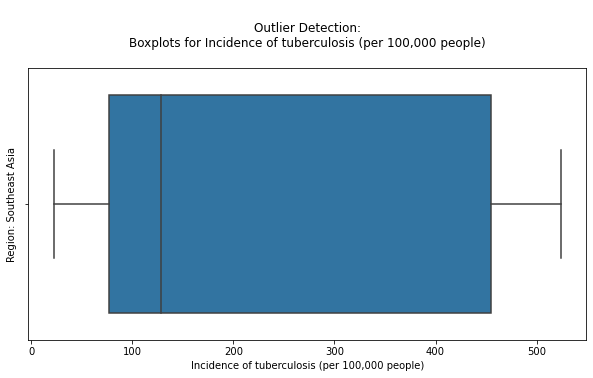

In [32]:
# Building Boxplot for Incidence of tuberculosis (per 100,000 people)

#setting figure size
fig, ax = plt.subplots(figsize = [10, 5])

#developing a boxplot for Incidence of tuberculosis (per 100,000 people)
sns.boxplot(x = "Incidence of tuberculosis (per 100,000 people)",
           y = None,
           hue = None,
           orient = 'h',
           data = asia)

#formating and displaying the plot
plt.title(label = """
Outlier Detection:
Boxplots for Incidence of tuberculosis (per 100,000 people)
""")
plt.xlabel(xlabel = "Incidence of tuberculosis (per 100,000 people)")
plt.ylabel(ylabel = "Region: Southeast Asia")
plt.show()

## Country Representing our Region

Having identified the features that makes our region unique, the next part will focus on finding the country best representing our region. 

The methodology for this is an weighted analysis using the 10 variables that represents our regions the best. These can be viewed below, together with the countries closest and 2nd closest to the mean or median. The reasoning for choosing mean or median is the same methodology for missing values.  

In [34]:
#Weighted Average Part 1:
#Searching for best representative country for next column 
A = asia['Adolescent fertility rate (births per 1,000 women ages 15-19)'].median()
print(f"""  \033[1m 
The median for Adolescent fertility rate (births per 1,000 women ages 15-19) is: {A} \033[0m """) 
print("""
The two values closests to this is:
1) BRN - 16,52
2) MYS - 12,82
""")

#appending the countries to the list 
lst = ['BRN']
sec = ['MYS']

#Searching for best representative country for next column 
E = asia['Births attended by skilled health staff (% of total)'].median()
print(f"""  \033[1m 
The median for Births attended by skilled health staff (% of total)) is: {E} \033[0m """) 
print("""
The two values closests to this is:
1) IDN - 74,86
2) PHL - 62,2
""")

#appending the countries to the list 
lst.append('IDN')
sec.append('PHL')

#Searching for best representative country for next column 
L = asia['Fertility rate, total (births per woman)'].median()
print(f"""  \033[1m 
The median for Fertility rate, total (births per woman): {L} \033[0m """) 
print("""
The two values closests to this is:
1) VNM - 1,92
2) PRK - 1,99
""")

#appending the countries to the list 
lst.append('IDN')
sec.append('PRK')

print("The three variables above are the ones chosen related to health")

#Searching for best representative country for next column 
B = asia['Contributing family workers, total (% of total employment)'].median()
print(f"""  \033[1m 
The median for Contributing family workers, total (% of total employment): {B} \033[0m """) 
print("""
The two values closests to this is:
1) PHL - 12,50
2) KOR - 5,74
""")

#appending the countries to the list 
lst.append('PHL')
sec.append('KOR')

#Searching for best representative country for next column 
B = asia['Population, total'].mean()
print(f""" \033[1m 
The mean for Population, total : {B} \033[0m""") 
print("""
The two values closests to this is:
1) KOR - 49054708
2) MYS - 27111069
""")

#appending the countries to the list 
lst.append('KOR')
sec.append('MYS')

#Searching for best representative country for next column 
B = asia['Adjusted net enrollment rate, primary (% of primary school age children)'].mean()
print(f""" \033[1m 
The mean for Adjusted net enrollment rate, primary (% of primary school age children) is: {B} \033[0m""") 
print("""
The two values closests to this is:
1) PHL - 88,66
2) KHM - 94,60
""")

#appending the countries to the list 
lst.append('KHM')
sec.append('PHL')

#Searching for best representative country for next column 
D = asia['Trade (% of GDP)'].median()
print(f"""  \033[1m 
The median for Trade (% of GDP) is: {D} \033[0m """) 
print("""
The two values closests to this is:
1) KOR - 99,93
2) MAC - 127,27
""")

#appending the countries to the list 
lst.append('KOR')
sec.append('MYS')

#Searching for best representative country for next column 
F = asia['Net ODA received per capita (current US$)'].median()
print(f"""  \033[1m 
The median for Net ODA received per capita (current US$): {F} \033[0m """) 
print("""
The two values closests to this is:
1) PRK - 8,47
2) VNM - 29,39
""")

#appending the countries to the list 
lst.append('PRK')
sec.append('VNM')

#Searching for best representative country for next column 
H = asia['Tuberculosis death rate (per 100,000 people), including HIV'].median()
print(f"""  \033[1m 
The median for Tuberculosis death rate (per 100,000 people), including HIV: {H} \033[0m """) 
print("""
The two values closests to this is:
1) VNM - 23
1) MAC - 7.2
2) KOR - 6
""")

#appending the countries to the list 
lst.append('VNM')
lst.append('MAC')
sec.append('KOR')



   
The median for Adolescent fertility rate (births per 1,000 women ages 15-19) is: 14.675  

The two values closests to this is:
1) BRN - 16,52
2) MYS - 12,82

   
The median for Births attended by skilled health staff (% of total)) is: 79.0685  

The two values closests to this is:
1) IDN - 74,86
2) PHL - 62,2

   
The median for Fertility rate, total (births per woman): 1.955  

The two values closests to this is:
1) VNM - 1,92
2) PRK - 1,99

The three variables above are the ones chosen related to health
   
The median for Contributing family workers, total (% of total employment): 9.129999999999999  

The two values closests to this is:
1) PHL - 12,50
2) KOR - 5,74

  
The mean for Population, total : 48277462.071428575 

The two values closests to this is:
1) KOR - 49054708
2) MYS - 27111069

  
The mean for Adjusted net enrollment rate, primary (% of primary school age children) is: 91.44785714285715 

The two values closests to this is:
1) PHL - 88,66
2) KHM - 94,60

   
The m

In [35]:
# Weighted Average Part 2
# count times country was closest
count1 = lst.count('BRN')
count2 = lst.count('HKG')
count3 = lst.count('IDN')
count4 = lst.count('JPN')
count5 = lst.count('KHM')
count6 = lst.count('KOR')
count7 = lst.count('LAO')
count8 = lst.count('MAC')
count9 = lst.count('MYS')
count10 = lst.count('PHL')
count11 = lst.count('PRK')
count12 = lst.count('SGP')
count13 = lst.count('TLS')
count14 = lst.count('VNM')

# count times country was 2nd closest
c1 = sec.count('BRN')
c2 = sec.count('HKG')
c3 = sec.count('IDN')
c4 = sec.count('JPN')
c5 = sec.count('KHM')
c6 = sec.count('KOR')
c7 = sec.count('LAO')
c8 = sec.count('MAC')
c9 = sec.count('MYS')
c10 = sec.count('PHL')
c11 = sec.count('PRK')
c12 = sec.count('SGP')
c13 = sec.count('TLS')
c14 = sec.count('VNM')

# print count
print('The no. of times BRN was closest:', count1, 'and 2nd closests:', c1) 
print('The no. of times HKG was closest:', count2, 'and 2nd closests:', c2)
print('The no. of times IDN was closest:', count3, 'and 2nd closests:', c3)
print('The no. of times JPN was closest:', count4, 'and 2nd closests:', c4)
print('The no. of times KHM was closest:', count5, 'and 2nd closests:', c5)
print('The no. of times KOR was closest:', count6, 'and 2nd closests:', c6)
print('The no. of times LAO was closest:', count7, 'and 2nd closests:', c7)
print('The no. of times MAC was closest:', count8, 'and 2nd closests:', c8)
print('The no. of times MYS was closest:', count9, 'and 2nd closests:', c9)
print('The no. of times PHL was closest:', count10, 'and 2nd closests:', c10)
print('The no. of times PRK was closest:', count11, 'and 2nd closests:', c11)
print('The no. of times SGP was closest:', count12, 'and 2nd closests:', c12)
print('The no. of times TLS was closest:', count13, 'and 2nd closests:', c13)
print('The no. of times VNM was closest:', count14, 'and 2nd closests:', c14)

The no. of times BRN was closest: 1 and 2nd closests: 0
The no. of times HKG was closest: 0 and 2nd closests: 0
The no. of times IDN was closest: 2 and 2nd closests: 0
The no. of times JPN was closest: 0 and 2nd closests: 0
The no. of times KHM was closest: 1 and 2nd closests: 0
The no. of times KOR was closest: 2 and 2nd closests: 2
The no. of times LAO was closest: 0 and 2nd closests: 0
The no. of times MAC was closest: 1 and 2nd closests: 0
The no. of times MYS was closest: 0 and 2nd closests: 3
The no. of times PHL was closest: 1 and 2nd closests: 2
The no. of times PRK was closest: 1 and 2nd closests: 1
The no. of times SGP was closest: 0 and 2nd closests: 0
The no. of times TLS was closest: 0 and 2nd closests: 0
The no. of times VNM was closest: 1 and 2nd closests: 1


Final score count:
    Being closest to mean or median is 100 point
    Being 2nd closest to mean or median is 50 point

In [36]:
# Weighted Average Part 3
#counting the varibles through an weighted analysis
#closest to mean or median 100 points
#2nd closests to mean or median 50 points

BRN = ((count1 * 100) + (c1 * 50))
HKG = ((count2 * 100) + (c2 * 50))
IDN = ((count3 * 100) + (c3 * 50))
JPN = ((count4 * 100) + (c4 * 50))
KHM = ((count5 * 100) + (c5 * 50))
KOR = ((count6 * 100) + (c6 * 50))
LAO = ((count7 * 100) + (c7 * 50))
MAC = ((count8 * 100) + (c8 * 50))
MYS = ((count9 * 100) + (c9 * 50))
PHL = ((count10 * 100) + (c10 * 50))
PRK = ((count11 * 100) + (c11 * 50))
SGP = ((count12 * 100) + (c12 * 50))
TLS = ((count13 * 100) + (c13 * 50))
VNM = ((count14 * 100) + (c14 * 50))


print('Final score:')
print('BRN:', BRN,) 
print('HKG:', HKG,)
print('IDN:', IDN,) 
print('JPN:', JPN,)
print('KHM:', KHM,) 
print('KOR:', KOR,) 
print('LAO:', LAO,) 
print('MAC:', MAC,)
print('MYS:', MYS,) 
print('PHL:', PHL,) 
print('PRK:', PRK,) 
print('SGP:', SGP,) 
print('TLS:', TLS,) 
print('VNM:', VNM,) 

print("""
________________
Country best representing our region, South East Asia:
KOREA""")


Final score:
BRN: 100
HKG: 0
IDN: 200
JPN: 0
KHM: 100
KOR: 300
LAO: 0
MAC: 100
MYS: 150
PHL: 200
PRK: 150
SGP: 0
TLS: 0
VNM: 150

________________
Country best representing our region, South East Asia:
KOREA


It was found that South Korea is the country best representing our region. The main reason for this is the diversity in South East Asia which accordingly means that a lot of the countries either was scoring high or low whereas South Korea often was placed in the middle. Hence, South Korea was often placed close to the mean and/or median of the dataset. 

## References

Major Sources:
-----Asia Intro---------
Introduction to Southeast Asia. (n.d.). Asia Society. Retrieved November 3, 2020, from https://asiasociety.org/education/introduction-southeast-asia

-----Definition of Improved Sanitation Facilities from World Bank------
Glossary | DataBank. (n.d.). Retrieved November 3, 2020, from https://databank.worldbank.org/metadataglossary/millennium-development-goals/series/SH.STA.ACSN

----- Statista stating what Low GDP per capita means------
Top 20 lowest GDP countries 2017. (n.d.). Statista. Retrieved November 3, 2020, from https://www.statista.com/statistics/256547/the-20-countries-with-the-lowest-gdp-per-capita/

----- Info on Literacy Rate ---------
Glossary | DataBank. (n.d.). Retrieved November 3, 2020, from https://databank.worldbank.org/metadataglossary/environment-social-and-governance-(esg)-data/series/SE.ADT.LITR.ZS

----- Info on ODA and Poverty Gap data -----
Why is there missing data for high-income countries? – World Bank Data Help Desk. (n.d.). Retrieved November 3, 2020, from https://datahelpdesk.worldbank.org/knowledgebase/articles/198559-why-is-there-missing-data-for-high-income-countrie

----- Fertility in South East Asia ------
Fertility-in-south-east-asia-final.pdf. (n.d.). Retrieved November 4, 2020, from https://www.eiu.com/graphics/marketing/pdf/fertility-in-south-east-asia-final.pdf

----- Japan Trade % of GDP -----
Kajimoto, T. (2019, February 20). Japan’s exports fall most in two years as China shipments weaken. Reuters. https://www.reuters.com/article/us-japan-economy-trade-idUSKCN1Q82WP

----- Hong Kong Trade % of GDP -----
Lee, Y. N. (2020, June 18). These charts show why Hong Kong is important to China. CNBC. https://www.cnbc.com/2020/06/18/these-charts-show-why-hong-kong-is-important-to-china.html

----- East Timor Trade % of GDP
Timor-Leste. (n.d.). Retrieved November 4, 2020, from https://www.intracen.org/country/timor-leste/


-----Macau and Hong Kong measles info-------
WHO | Measles – Western Pacific Region. (n.d.). WHO; World Health Organization. Retrieved November 3, 2020, from http://www.who.int/csr/don/07-may-2019-measles-western-pacific-region/en/

-----Why data is missing for smaller countries--------
Why can’t I find data on some small countries? – World Bank Data Help Desk. (n.d.). Retrieved November 3, 2020, from https://datahelpdesk.worldbank.org/knowledgebase/articles/587637-why-can-t-i-find-data-on-some-small-countries

## Appendix
Appendix 1: Skewed data 

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


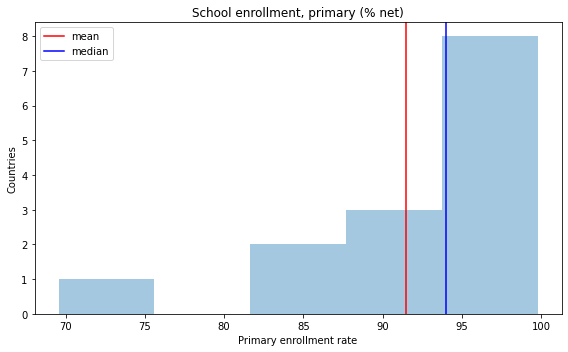

In [37]:
#Median cause skewed right

# setting figure size
fig, ax = plt.subplots(figsize = [8, 5])


# histogram for School enrollment, primary (% net)
sns.distplot(a     = asia['School enrollment, primary (% net)'],
             bins  = 'fd',
             hist  = True,
             kde   = False,
             rug   = False,)

# titles and labels
plt.title(label = "School enrollment, primary (% net)")
plt.xlabel(xlabel = 'Primary enrollment rate')
plt.ylabel(ylabel = 'Countries')


# New: These add vertical lines to the code
plt.axvline(x = asia['School enrollment, primary (% net)'].mean(),
            color = 'red')


plt.axvline(x = asia['School enrollment, primary (% net)'].median(),
            color = 'blue')


# this adds a legend
plt.legend(labels =  ['mean', 'median'])


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

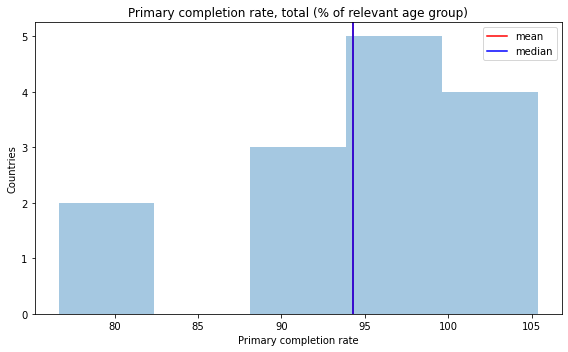

In [38]:
#Mean cause skewed left

# setting figure size
fig, ax = plt.subplots(figsize = [8, 5])


# histogram for Primary completion rate, total (% of relevant age group)
sns.distplot(a     = asia['Primary completion rate, total (% of relevant age group)'],
             bins  = 'fd',
             hist  = True,
             kde   = False,
             rug   = False,)

# titles and labels
plt.title(label = "Primary completion rate, total (% of relevant age group)")
plt.xlabel(xlabel = 'Primary completion rate')
plt.ylabel(ylabel = 'Countries')


# New: These add vertical lines to the code
plt.axvline(x = asia['Primary completion rate, total (% of relevant age group)'].mean(),
            color = 'red')


plt.axvline(x = asia['Primary completion rate, total (% of relevant age group)'].median(),
            color = 'blue')


# this adds a legend
plt.legend(labels =  ['mean', 'median'])


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


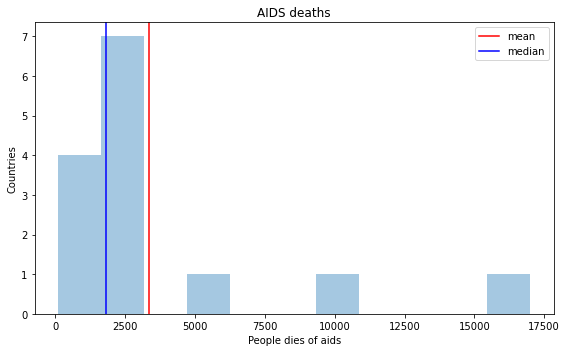

In [39]:
#Median cause skewed right

# setting figure size
fig, ax = plt.subplots(figsize = [8, 5])


# histogram for AIDS estimated deaths (UNAIDS estimates)
sns.distplot(a     = asia['AIDS estimated deaths (UNAIDS estimates)'],
             bins  = 'fd',
             hist  = True,
             kde   = False,
             rug   = False,)

# titles and labels
plt.title(label = "AIDS deaths")
plt.xlabel(xlabel = 'People dies of aids')
plt.ylabel(ylabel = 'Countries')


# New: These add vertical lines to the code
plt.axvline(x = asia['AIDS estimated deaths (UNAIDS estimates)'].mean(),
            color = 'red')


plt.axvline(x = asia['AIDS estimated deaths (UNAIDS estimates)'].median(),
            color = 'blue')


# this adds a legend
plt.legend(labels =  ['mean', 'median'])


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


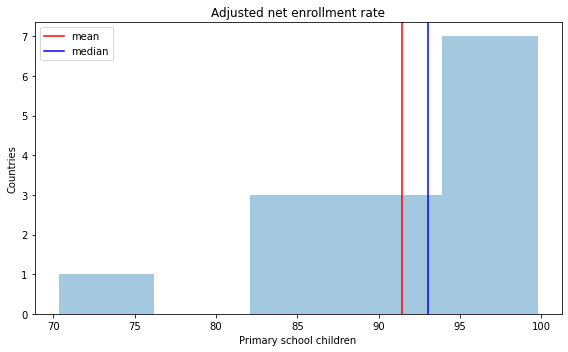

In [40]:
#Mean cause skewed left

# setting figure size
fig, ax = plt.subplots(figsize = [8, 5])


# histogram for Adjusted net enrollment rate, primary (% of primary school age children)
sns.distplot(a     = asia['Adjusted net enrollment rate, primary (% of primary school age children)'],
             bins  = 'fd',
             hist  = True,
             kde   = False,
             rug   = False,)

# titles and labels
plt.title(label = "Adjusted net enrollment rate")
plt.xlabel(xlabel = 'Primary school children')
plt.ylabel(ylabel = 'Countries')


# New: These add vertical lines to the code
plt.axvline(x = asia['Adjusted net enrollment rate, primary (% of primary school age children)'].mean(),
            color = 'red')


plt.axvline(x = asia['Adjusted net enrollment rate, primary (% of primary school age children)'].median(),
            color = 'blue')


# this adds a legend
plt.legend(labels =  ['mean', 'median'])


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


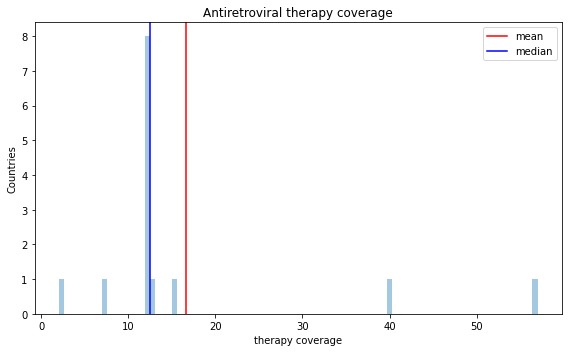

In [41]:
#Median cause skewed right

# setting figure size
fig, ax = plt.subplots(figsize = [8, 5])


# histogram for Antiretroviral therapy coverage (% of people living with HIV)
sns.distplot(a     = asia['Antiretroviral therapy coverage (% of people living with HIV)'],
             bins  = 'fd',
             hist  = True,
             kde   = False,
             rug   = False,)

# titles and labels
plt.title(label = "Antiretroviral therapy coverage")
plt.xlabel(xlabel = 'therapy coverage')
plt.ylabel(ylabel = 'Countries')


# New: These add vertical lines to the code
plt.axvline(x = asia['Antiretroviral therapy coverage (% of people living with HIV)'].mean(),
            color = 'red')


plt.axvline(x = asia['Antiretroviral therapy coverage (% of people living with HIV)'].median(),
            color = 'blue')


# this adds a legend
plt.legend(labels =  ['mean', 'median'])


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


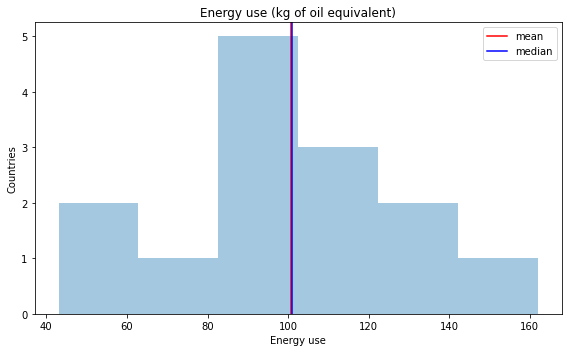

In [42]:
#Mean cause skewed left

# setting figure size
fig, ax = plt.subplots(figsize = [8, 5])


# histogram for Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)
sns.distplot(a     = asia['Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)'],
             bins  = 'fd',
             hist  = True,
             kde   = False,
             rug   = False,)

# titles and labels
plt.title(label = "Energy use (kg of oil equivalent)")
plt.xlabel(xlabel = 'Energy use')
plt.ylabel(ylabel = 'Countries')


# New: These add vertical lines to the code
plt.axvline(x = asia['Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)'].mean(),
            color = 'red')


plt.axvline(x = asia['Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)'].median(),
            color = 'blue')


# this adds a legend
plt.legend(labels =  ['mean', 'median'])


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


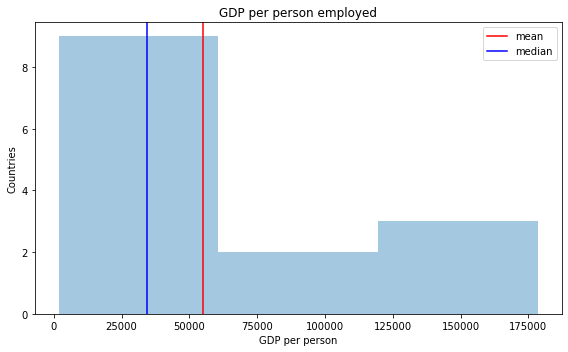

In [43]:
#Median cause skewed right

# setting figure size
fig, ax = plt.subplots(figsize = [8, 5])


# histogram for GDP per person employed (constant 2011 PPP $)
sns.distplot(a     = asia['GDP per person employed (constant 2011 PPP $)'],
             bins  = 'fd',
             hist  = True,
             kde   = False,
             rug   = False,)

# titles and labels
plt.title(label = "GDP per person employed")
plt.xlabel(xlabel = 'GDP per person')
plt.ylabel(ylabel = 'Countries')


# New: These add vertical lines to the code
plt.axvline(x = asia['GDP per person employed (constant 2011 PPP $)'].mean(),
            color = 'red')


plt.axvline(x = asia['GDP per person employed (constant 2011 PPP $)'].median(),
            color = 'blue')


# this adds a legend
plt.legend(labels =  ['mean', 'median'])


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


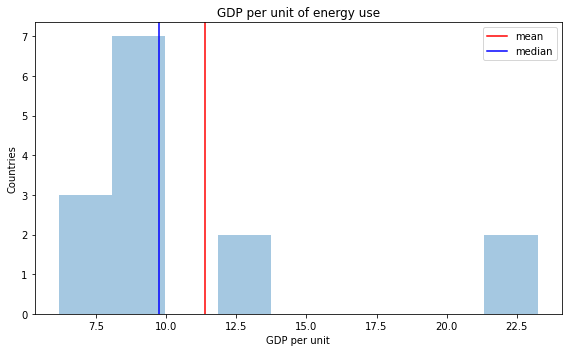

In [44]:
#Median cause skewed right

# setting figure size
fig, ax = plt.subplots(figsize = [8, 5])


# histogram for GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent)
sns.distplot(a     = asia['GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent)'],
             bins  = 'fd',
             hist  = True,
             kde   = False,
             rug   = False,)

# titles and labels
plt.title(label = "GDP per unit of energy use")
plt.xlabel(xlabel = 'GDP per unit')
plt.ylabel(ylabel = 'Countries')


# New: These add vertical lines to the code
plt.axvline(x = asia['GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent)'].mean(),
            color = 'red')


plt.axvline(x = asia['GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent)'].median(),
            color = 'blue')


# this adds a legend
plt.legend(labels =  ['mean', 'median'])


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


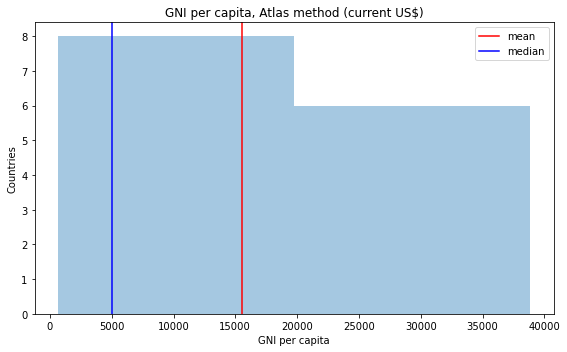

In [45]:
#Median cause skewed right

# setting figure size
fig, ax = plt.subplots(figsize = [8, 5])


# histogram for GNI per capita, Atlas method (current US$)
sns.distplot(a     = asia['GNI per capita, Atlas method (current US$)'],
             bins  = 'fd',
             hist  = True,
             kde   = False,
             rug   = False,)

# titles and labels
plt.title(label = "GNI per capita, Atlas method (current US$)")
plt.xlabel(xlabel = 'GNI per capita')
plt.ylabel(ylabel = 'Countries')


# New: These add vertical lines to the code
plt.axvline(x = asia['GNI per capita, Atlas method (current US$)'].mean(),
            color = 'red')


plt.axvline(x = asia['GNI per capita, Atlas method (current US$)'].median(),
            color = 'blue')


# this adds a legend
plt.legend(labels =  ['mean', 'median'])


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


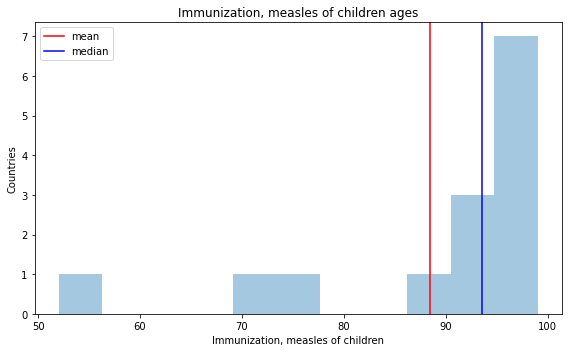

In [46]:
#Mean cause skewed left

# setting figure size
fig, ax = plt.subplots(figsize = [8, 5])


# histogram for Immunization, measles (% of children ages 12-23 months)
sns.distplot(a     = asia['Immunization, measles (% of children ages 12-23 months)'],
             bins  = 'fd',
             hist  = True,
             kde   = False,
             rug   = False,)

# titles and labels
plt.title(label = "Immunization, measles of children ages")
plt.xlabel(xlabel = 'Immunization, measles of children')
plt.ylabel(ylabel = 'Countries')


# New: These add vertical lines to the code
plt.axvline(x = asia['Immunization, measles (% of children ages 12-23 months)'].mean(),
            color = 'red')


plt.axvline(x = asia['Immunization, measles (% of children ages 12-23 months)'].median(),
            color = 'blue')


# this adds a legend
plt.legend(labels =  ['mean', 'median'])


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


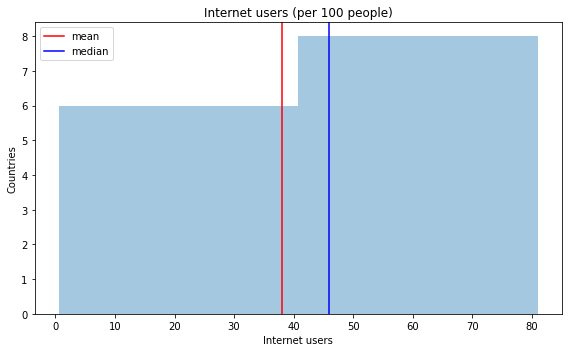

In [47]:
#Mean cause skewed left

# setting figure size
fig, ax = plt.subplots(figsize = [8, 5])


# histogram for Internet users (per 100 people)
sns.distplot(a     = asia['Internet users (per 100 people)'],
             bins  = 'fd',
             hist  = True,
             kde   = False,
             rug   = False,)

# titles and labels
plt.title(label = "Internet users (per 100 people)")
plt.xlabel(xlabel = 'Internet users')
plt.ylabel(ylabel = 'Countries')


# New: These add vertical lines to the code
plt.axvline(x = asia['Internet users (per 100 people)'].mean(),
            color = 'red')


plt.axvline(x = asia['Internet users (per 100 people)'].median(),
            color = 'blue')


# this adds a legend
plt.legend(labels =  ['mean', 'median'])


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


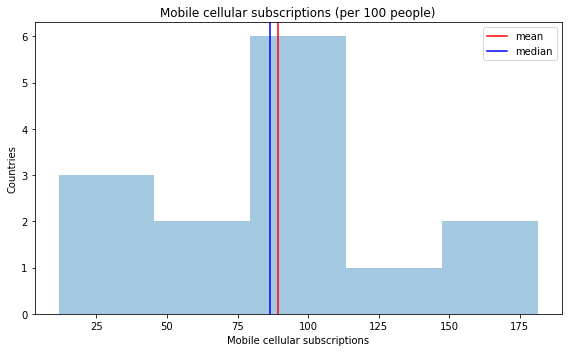

In [48]:
#Median cause skewed right

# setting figure size
fig, ax = plt.subplots(figsize = [8, 5])


# histogram for Mobile cellular subscriptions (per 100 people)
sns.distplot(a     = asia['Mobile cellular subscriptions (per 100 people)'],
             bins  = 'fd',
             hist  = True,
             kde   = False,
             rug   = False,)

# titles and labels
plt.title(label = "Mobile cellular subscriptions (per 100 people)")
plt.xlabel(xlabel = 'Mobile cellular subscriptions')
plt.ylabel(ylabel = 'Countries')


# New: These add vertical lines to the code
plt.axvline(x = asia['Mobile cellular subscriptions (per 100 people)'].mean(),
            color = 'red')


plt.axvline(x = asia['Mobile cellular subscriptions (per 100 people)'].median(),
            color = 'blue')


# this adds a legend
plt.legend(labels =  ['mean', 'median'])


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


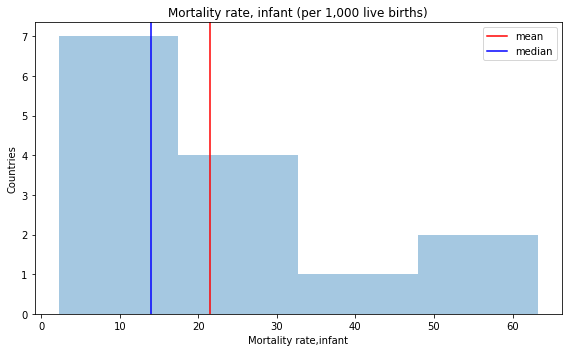

In [49]:
#Median cause skewed right

# setting figure size
fig, ax = plt.subplots(figsize = [8, 5])


# histogram for Mortality rate, infant (per 1,000 live births)
sns.distplot(a     = asia['Mortality rate, infant (per 1,000 live births)'],
             bins  = 'fd',
             hist  = True,
             kde   = False,
             rug   = False,)

# titles and labels
plt.title(label = "Mortality rate, infant (per 1,000 live births)")
plt.xlabel(xlabel = 'Mortality rate,infant')
plt.ylabel(ylabel = 'Countries')


# New: These add vertical lines to the code
plt.axvline(x = asia['Mortality rate, infant (per 1,000 live births)'].mean(),
            color = 'red')


plt.axvline(x = asia['Mortality rate, infant (per 1,000 live births)'].median(),
            color = 'blue')


# this adds a legend
plt.legend(labels =  ['mean', 'median'])


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


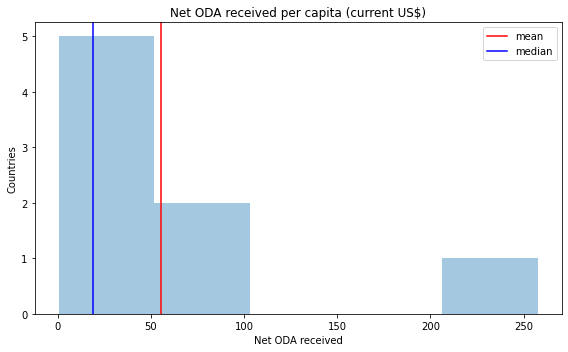

In [50]:
#Median cause skewed right

# setting figure size
fig, ax = plt.subplots(figsize = [8, 5])


# histogram for Net ODA received per capita (current US$)
sns.distplot(a     = asia['Net ODA received per capita (current US$)'],
             bins  = 'fd',
             hist  = True,
             kde   = False,
             rug   = False,)

# titles and labels
plt.title(label = "Net ODA received per capita (current US$)")
plt.xlabel(xlabel = 'Net ODA received')
plt.ylabel(ylabel = 'Countries')


# New: These add vertical lines to the code
plt.axvline(x = asia['Net ODA received per capita (current US$)'].mean(),
            color = 'red')


plt.axvline(x = asia['Net ODA received per capita (current US$)'].median(),
            color = 'blue')


# this adds a legend
plt.legend(labels =  ['mean', 'median'])


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


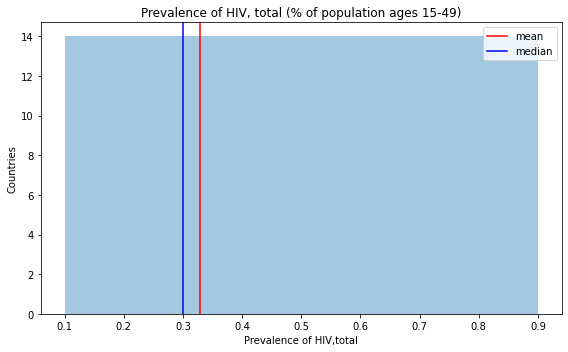

In [51]:
#Median cause skewed right

# setting figure size
fig, ax = plt.subplots(figsize = [8, 5])


# histogram for Prevalence of HIV, total (% of population ages 15-49)
sns.distplot(a     = asia['Prevalence of HIV, total (% of population ages 15-49)'],
             bins  = 'fd',
             hist  = True,
             kde   = False,
             rug   = False,)

# titles and labels
plt.title(label = "Prevalence of HIV, total (% of population ages 15-49)")
plt.xlabel(xlabel = 'Prevalence of HIV,total')
plt.ylabel(ylabel = 'Countries')


# New: These add vertical lines to the code
plt.axvline(x = asia['Prevalence of HIV, total (% of population ages 15-49)'].mean(),
            color = 'red')


plt.axvline(x = asia['Prevalence of HIV, total (% of population ages 15-49)'].median(),
            color = 'blue')


# this adds a legend
plt.legend(labels =  ['mean', 'median'])


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


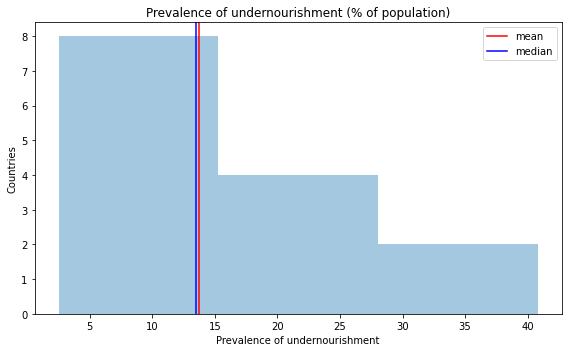

In [52]:
#Median cause skewed right

# setting figure size
fig, ax = plt.subplots(figsize = [8, 5])


# histogram for Prevalence of undernourishment (% of population)
sns.distplot(a     = asia['Prevalence of undernourishment (% of population)'],
             bins  = 'fd',
             hist  = True,
             kde   = False,
             rug   = False,)

# titles and labels
plt.title(label = "Prevalence of undernourishment (% of population)")
plt.xlabel(xlabel = 'Prevalence of undernourishment')
plt.ylabel(ylabel = 'Countries')


# New: These add vertical lines to the code
plt.axvline(x = asia['Prevalence of undernourishment (% of population)'].mean(),
            color = 'red')


plt.axvline(x = asia['Prevalence of undernourishment (% of population)'].median(),
            color = 'blue')


# this adds a legend
plt.legend(labels =  ['mean', 'median'])


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


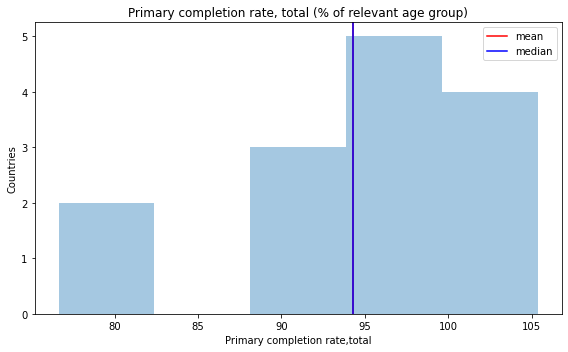

In [53]:
#Median cause skewed right

# setting figure size
fig, ax = plt.subplots(figsize = [8, 5])


# histogram for Primary completion rate, total (% of relevant age group)
sns.distplot(a     = asia['Primary completion rate, total (% of relevant age group)'],
             bins  = 'fd',
             hist  = True,
             kde   = False,
             rug   = False,)

# titles and labels
plt.title(label = "Primary completion rate, total (% of relevant age group)")
plt.xlabel(xlabel = 'Primary completion rate,total')
plt.ylabel(ylabel = 'Countries')


# New: These add vertical lines to the code
plt.axvline(x = asia['Primary completion rate, total (% of relevant age group)'].mean(),
            color = 'red')


plt.axvline(x = asia['Primary completion rate, total (% of relevant age group)'].median(),
            color = 'blue')


# this adds a legend
plt.legend(labels =  ['mean', 'median'])


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


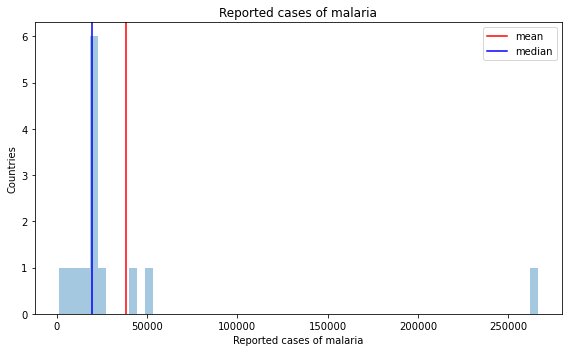

In [54]:
#Median cause skewed right

# setting figure size
fig, ax = plt.subplots(figsize = [8, 5])


# histogram for Reported cases of malaria
sns.distplot(a     = asia['Reported cases of malaria'],
             bins  = 'fd',
             hist  = True,
             kde   = False,
             rug   = False,)

# titles and labels
plt.title(label = "Reported cases of malaria")
plt.xlabel(xlabel = 'Reported cases of malaria')
plt.ylabel(ylabel = 'Countries')


# New: These add vertical lines to the code
plt.axvline(x = asia['Reported cases of malaria'].mean(),
            color = 'red')


plt.axvline(x = asia['Reported cases of malaria'].median(),
            color = 'blue')


# this adds a legend
plt.legend(labels =  ['mean', 'median'])


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


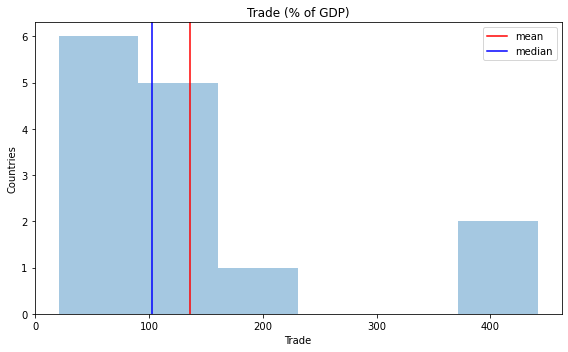

In [55]:
#Median cause skewed right

# setting figure size
fig, ax = plt.subplots(figsize = [8, 5])


# histogram for Trade (% of GDP)
sns.distplot(a     = asia['Trade (% of GDP)'],
             bins  = 'fd',
             hist  = True,
             kde   = False,
             rug   = False,)

# titles and labels
plt.title(label = "Trade (% of GDP)")
plt.xlabel(xlabel = 'Trade')
plt.ylabel(ylabel = 'Countries')


# New: These add vertical lines to the code
plt.axvline(x = asia['Trade (% of GDP)'].mean(),
            color = 'red')


plt.axvline(x = asia['Trade (% of GDP)'].median(),
            color = 'blue')


# this adds a legend
plt.legend(labels =  ['mean', 'median'])


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()